<a href="https://colab.research.google.com/github/bsmrvl/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [83]:
import numpy as np

sales_last_week = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [23]:
def mean(nums):
  return nums.sum() / len(nums)

def samp_var(nums):
  mn = mean(nums)
  n = len(nums)
  sum = 0
  for num in nums:
    sum = sum + (num - mn)**2
  return sum / (n-1)

def stdev(nums):
  return samp_var(nums)**(1/2)

print('Mean:\t\t\t', mean(sales_last_week))
print('Sample Variance:\t', samp_var(sales_last_week))
print('Standard Deviation:\t', stdev(sales_last_week))

Mean:			 3052.714285714286
Sample Variance:	 214387.90476190473
Standard Deviation:	 463.0204150595357


In [26]:
# Compare to library functions to check.

print('Mean:\t\t\t', sales_last_week.mean())
print('Sample Variance:\t', sales_last_week.var(ddof=1))
print('Standard Deviation:\t', sales_last_week.std(ddof=1))

Mean:			 3052.714285714286
Sample Variance:	 214387.90476190473
Standard Deviation:	 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [30]:
cust_last_week = np.array([127,80,105,92,120,115,93])

np.cov(sales_last_week, cust_last_week, ddof=1)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [32]:
# Elements on either side of the main diagonal are the same. We can select one of
# these to use as our single covariance value.

covar = np.cov(sales_last_week, cust_last_week, ddof=1)[1][0]
covar

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [33]:
# Using the function I created for stdev:

std_sales = stdev(sales_last_week)
std_cust = stdev(cust_last_week)

# Correlation

corr = covar / (std_sales * std_cust)
corr

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [34]:
import pandas as pd

titanic_clean = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic_clean.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [86]:
titanic_numeric = titanic_clean.select_dtypes(include=['float64','int64'])
titanic_numeric.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [87]:
titanic_numeric.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1189
has_cabin_number       0
dtype: int64

In [88]:
# Let's drop 'body' since there are so many NaNs, and then drop the remaining rows
# which have NaNs (there are only a few).

titanic_numeric = titanic_numeric.drop(['Unnamed: 0','body'], axis=1).dropna()
titanic_numeric.isnull().sum()

pclass              0
survived            0
age                 0
sibsp               0
parch               0
fare                0
has_cabin_number    0
dtype: int64

In [91]:
titanic_numeric.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [89]:
np.cov(titanic_numeric, rowvar=False)

array([[ 7.02125581e-01, -1.27139444e-01, -3.97416168e+00,
         5.34004151e-02,  1.35052610e-02, -2.42277878e+01,
        -2.50062004e-01],
       [-1.27139444e-01,  2.36318670e-01, -3.05628598e-01,
        -1.42446343e-02,  3.46897089e-02,  6.14602308e+00,
         6.13866992e-02],
       [-3.97416168e+00, -3.05628598e-01,  1.65385957e+02,
        -2.55006934e+00, -1.45146725e+00,  1.14416613e+02,
         1.47066086e+00],
       [ 5.34004151e-02, -1.42446343e-02, -2.55006934e+00,
         1.08569184e+00,  3.36943627e-01,  8.64176773e+00,
        -4.03555075e-03],
       [ 1.35052610e-02,  3.46897089e-02, -1.45146725e+00,
         3.36943627e-01,  7.49654296e-01,  9.92803117e+00,
         1.32595832e-02],
       [-2.42277878e+01,  6.14602308e+00,  1.14416613e+02,
         8.64176773e+00,  9.92803117e+00,  2.67895974e+03,
         1.09769611e+01],
       [-2.50062004e-01,  6.13866992e-02,  1.47066086e+00,
        -4.03555075e-03,  1.32595832e-02,  1.09769611e+01,
         1.7480269

In [90]:
np.corrcoef(titanic_numeric, rowvar=False).round(3)

array([[ 1.   , -0.312, -0.369,  0.061,  0.019, -0.559, -0.714],
       [-0.312,  1.   , -0.049, -0.028,  0.082,  0.244,  0.302],
       [-0.369, -0.049,  1.   , -0.19 , -0.13 ,  0.172,  0.274],
       [ 0.061, -0.028, -0.19 ,  1.   ,  0.373,  0.16 , -0.009],
       [ 0.019,  0.082, -0.13 ,  0.373,  1.   ,  0.222,  0.037],
       [-0.559,  0.244,  0.172,  0.16 ,  0.222,  1.   ,  0.507],
       [-0.714,  0.302,  0.274, -0.009,  0.037,  0.507,  1.   ]])

In [ ]:
# Finally something visually useful! Going further I would turn this back into
# a dataframe to clearly see which variables have the highest correlations. Something
# I can see right off the bat is that survival (second column/row), is not strongly
# correlated to any of the other variables.

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

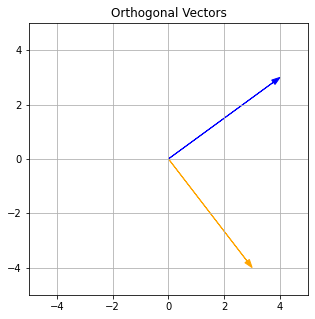

In [100]:
# Perpendicular is a synonym for orthogonal.

o = np.array([4,3])
r = np.array([3,-4])

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[5,5])
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

ax.arrow(0,0,o[0],o[1], head_width=.2, length_includes_head=True, color='blue')
ax.arrow(0,0,r[0],r[1], head_width=.2, length_includes_head=True, color='orange')

ax.set_title('Orthogonal Vectors')
ax.grid(b=True)

plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [102]:
a = np.array([[-5],[3],[7]])
b = np.array([[6],[-8],[2]])

np.dot(a.T[0], b.T[0])

# These are not orthogonal -- their dot product is not zero.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [105]:
c = np.array([2,-15,6,20])

print('||c||^2: ', np.linalg.norm(c)**2)
print('c dot c: ', np.dot(c, c))
print('c^T * c: ', np.matmul(c.T, c))

# These are all ways of calculating the dot product!

||c||^2:  665.0
c dot c:  665
c^T * c:  665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [109]:
f = np.array([4,12,11,9,2])

f_unit = f / np.linalg.norm(f)

print('f_unit norm: ', np.linalg.norm(f_unit).round(4))
f_unit

f_unit norm:  1.0


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

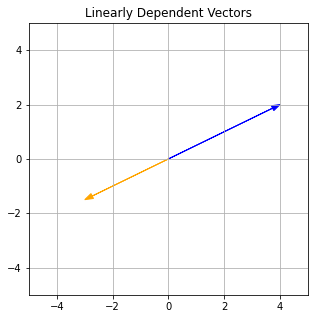

In [114]:
fig, ax = plt.subplots(figsize=[5,5])
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

ax.arrow(0,0, 4, 2, head_width=.2, length_includes_head=True, color='blue')
ax.arrow(0,0, -3, -1.5, head_width=.2, length_includes_head=True, color='orange')

ax.set_title('Linearly Dependent Vectors')
ax.grid(b=True)

plt.show()

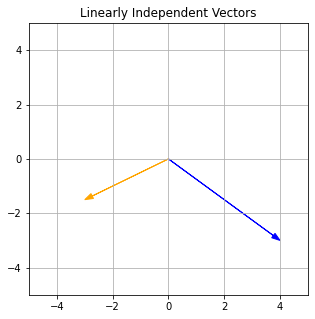

In [116]:
fig, ax = plt.subplots(figsize=[5,5])
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

ax.arrow(0,0, 4, -3, head_width=.2, length_includes_head=True, color='blue')
ax.arrow(0,0, -3, -1.5, head_width=.2, length_includes_head=True, color='orange')

ax.set_title('Linearly Independent Vectors')
ax.grid(b=True)

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [ ]:
# These vectors span the line y=2x (one-dimensional space)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [126]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])

LMN = np.row_stack([l, m, n])
LMN

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [129]:
LMN[1] = LMN[1] + LMN[0]
LMN[1] = LMN[1] / 2
LMN

array([[1, 2, 3],
       [0, 1, 4],
       [4, 8, 2]])

In [130]:
LMN[2] = LMN[2] - 4*LMN[0]
LMN

array([[  1,   2,   3],
       [  0,   1,   4],
       [  0,   0, -10]])

In [133]:
LMN[2] = -.1 * LMN[2]
LMN

array([[1, 2, 3],
       [0, 1, 4],
       [0, 0, 1]])

In [ ]:
# Since, in its reduced form, this matrix has a full diagonal of 1's, we know
# it spans R^3, a 3-dimensional vector space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



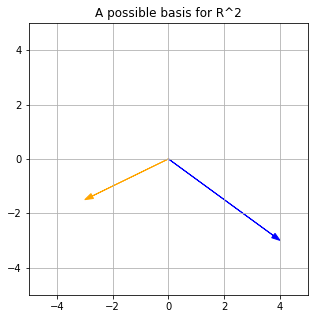

In [135]:
# This is basically the same question as graphing two linearly independent vectors.

fig, ax = plt.subplots(figsize=[5,5])
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

ax.arrow(0,0, 4, -3, head_width=.2, length_includes_head=True, color='blue')
ax.arrow(0,0, -3, -1.5, head_width=.2, length_includes_head=True, color='orange')

ax.set_title('A possible basis for R^2')
ax.grid(b=True)

plt.show()

## 6.2 What does it mean to form a basis?

A set of vectors forms a basis in a vector space if each is linearly independent from the rest (the dimensionality of the vector space being equal to the number of vectors in the set).

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

I already did the row reduction for this very matrix. It has a rank of **3**.

## 7.2 What does the rank of a matrix tell us?

The rank tells us the number of dimensions in the vector space which the matrix spans.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

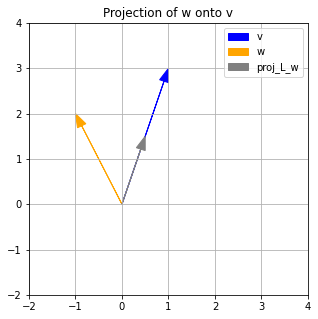

In [142]:
v = np.array([1,3])
w = np.array([-1,2])

proj_L_w = (np.dot(w, v) / np.dot(v, v)) * v 

fig, ax = plt.subplots(figsize=[5,5])
ax.set_xlim([-2,4])
ax.set_ylim([-2,4])

v_arrow = ax.arrow(0,0, v[0], v[1], head_width=.2, length_includes_head=True, color='blue')
w_arrow = ax.arrow(0,0, w[0], w[1], head_width=.2, length_includes_head=True, color='orange')
proj_arrow = ax.arrow(0,0, proj_L_w[0], proj_L_w[1], head_width=.2, length_includes_head=True, color='grey')

ax.set_title('Projection of w onto v')
ax.grid(b=True)
ax.legend([v_arrow, w_arrow, proj_arrow], ['v', 'w', 'proj_L_w'])

plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [238]:
def proj_yx(point):
  point = np.array(point)
  line = np.array([1,1])    # Spans y=x
  proj = (np.dot(point, line) / np.dot(line, line)) * line
  return proj[0], proj[1]

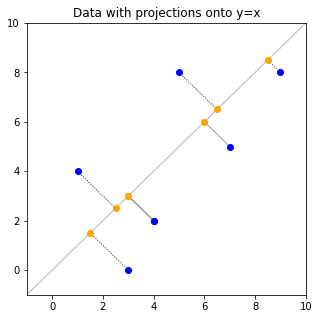

In [257]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

# Copy df and apply proj_yx function (above)

df_proj = df.copy().astype(float)
for index, row in df_proj.iterrows():
  row['x'], row['y'] = (proj_yx(row))

# Add difs between data and projections, to use for graphing.

df_proj['x_dif'] = df['x'] - df_proj['x']
df_proj['y_dif'] = df['y'] - df_proj['y']

# Plot it all.

fig, ax = plt.subplots(figsize=[5,5])
ax.set_xlim([-1,10])
ax.set_ylim([-1,10])

ax.set_title('Data with projections onto y=x')

ax.scatter(df.x, df.y, color='blue', zorder=100)
ax.scatter(df_proj.x, df_proj.y, color='orange', zorder=100)

ax.arrow(-1,-1,12,12, alpha=.2)     # y=x line
for i in range(df['x'].count()):
  ax.arrow(df_proj['x'][i], df_proj['y'][i], df_proj['x_dif'][i], df_proj['y_dif'][i], linestyle='dotted', linewidth=1, color='grey')

plt.show()